# Scikit-learn

scikit-learn is an open source Python machine learning module. It has a plethora of machine learning models and provides functions that are often needed for a machine learning workflow. As you will see, it has a nice and intuitive interface. It makes creating complicated machine learning workflows very easy. 

The full documentation for scikit-learn is located at https://scikit-learn.org/stable/. It contains numerous examples and detailed descriptions for each function (and its associated parameters). This notebook will give you a brief introduction on how to implement the basic machine learning pipeline.

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

The scikit-learn library contains a few small datasets that we can play around with

Descriptions of the datasets are included here: https://scikit-learn.org/stable/datasets/toy_dataset.html.
        
To illustrate a few concepts in data pre processing and ML pipeline, I will be using a toy dataset

In later part of lab, you will predict closing stock price of a company by applying linear regression model

In [18]:
from sklearn.datasets import load_boston #house price dataset

boston_dataset = load_boston() #loading data
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

**data** field in above dictionary represents the features of the data<br>
**target** represents house price<br>
**feature_names** correspond to names of features in data field<br>
**DESCR** tells us about description of data<br>

In [44]:
boston_df = pd.DataFrame(boston_dataset.data,columns = boston_dataset.feature_names)
target_df = pd.DataFrame(boston_dataset.target, columns = ['House Price'])

display(boston_df.head())
display(target_df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,House Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Splitting Data:-

Before interacting with the dataset any further, we must split the data into training and testing data. This way we can use the training data to explore the data and fit our models and then use the testing data to provide an unbiased measure of the performance of our models. 

This can be done using the train_test_split function in scikit-learn.

In [51]:
from sklearn.model_selection import train_test_split

# split the data with a 75%-25% training-test split
# set the random state for reproducible results else it can get give a different split everytime

boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
                                boston_df, target_df, test_size=0.25, random_state=500)

#checking whether splitting has happened or not

print(boston_X_train.shape)
print(boston_X_test.shape)
print(boston_y_train.shape)
print(boston_y_test.shape)

(379, 13)
(127, 13)
(379, 1)
(127, 1)


# Some Functionalities:-

Scikit-learn relies heavily on object-oriented programming principles. It implements machine learning algorithms as classes and users create objects:-



In [ ]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression() #declration of linear regression model


There are two main functionalities whenever we implement a ML model- Model fitting and prediction:-<br>

**model_lr.fit(X, y)**: trains/fit the model to the feature matrix  𝑋  and its corresponding labels  𝑦 <br>
**model_lr.predict(X)**: makes predictions on the passed data set  𝑋 .

Sometimes, we have to apply transformations on feature vectors as well:-<br>
    
**fit(X)**: trains/fits the transformation to the feature matrix  𝑋 .<br>
**transform(X)**: applies the transformation on  𝑋  using any parameters learned<br>
**fit_transform(X)**: applies both fit(X) and then transform(X).<br>

# Data Preprocessing:-

Often, the first step in data analysis is plotting the target variable or the value which we want to predict and see its distribution:-

(array([ 2.,  1.,  5.,  6.,  2.,  3.,  6.,  6.,  5., 22., 11., 14., 12.,
        11., 17., 22., 31., 23., 21., 20., 25., 13., 11.,  2.,  6.,  8.,
         7.,  9.,  5.,  5.,  6.,  7.,  2.,  6.,  4.,  3.,  1.,  1.,  0.,
         0.,  2.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  3.,  9.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <BarContainer object of 50 artists>)

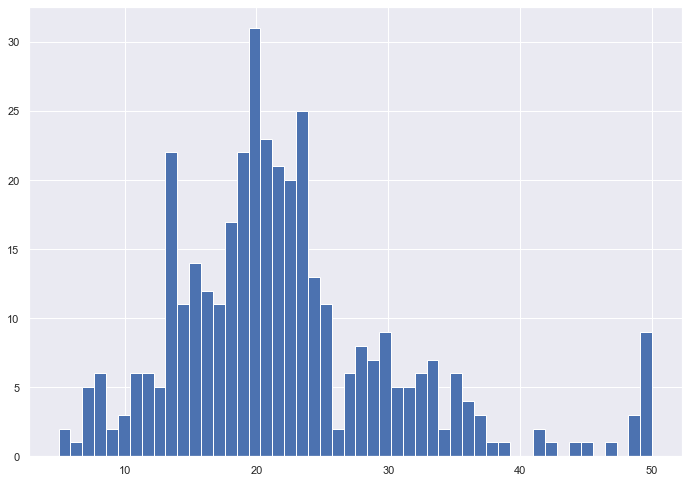

In [52]:
plt.hist(boston_y_train, bins = 50)

We can see from the above plot that the distribution looks like a normal distribution with some outliers:-

**1. Imputing Missing Data:-**

Missing data is a very common problem across all datasets. One simple strategy for addressing it is to impute missing values using a chosen strategy such as the "mean", "median" or some custom imputation. First, let's check for missing data in this dataset

In [55]:
boston_X_train.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

As these are "toy" datasets, they do not have any missing values but we learnt missing value imputation in last lecture. Please refer to session 2 notebook for the same

**2. Categorical Variable Handling(One Hot Encoding)**

Depending on the nature of our data and the ML models we want to implement, we will need to one-hot encode the categorical variables in our data. This means we will transform the feature into a set of dummy variables.

I am suspecting **CHAS** and **RAD** might be categorical variables, lets check that:-

In [57]:
print(boston_X_train['CHAS'].unique())
print(boston_X_train['RAD'].unique())

[0. 1.]
[ 5.  4.  3. 24.  8.  1.  6.  7.  2.]


RAD is a categorical variable which we will have to take care of in this case. 

The reason for the same is that any regression model will consider higher values of RAD to have greater effect on house prices. RAD just represents the index of accesibility, so we don't want any ordinality in that:- 

We will see how to apply one hot encoding only on this particular column:-

In [68]:
boston_X_train = pd.get_dummies(boston_X_train,prefix=['RAD'], columns = ['RAD'], drop_first=True)
boston_X_test = pd.get_dummies(boston_X_test,prefix=['RAD'], columns = ['RAD'], drop_first=True)

We pass the drop_first argument in the above function as **True**, because if a categorical variable has n unique values, we only need to create (n-1) seperate variables

In [72]:
boston_X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,403.0,14.7,364.31,7.39,0,0,0,1,0,0,0,0
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,307.0,21.0,386.75,14.67,0,0,1,0,0,0,0,0
269,0.09065,20.0,6.96,1.0,0.464,5.920,61.5,3.9175,223.0,18.6,391.34,13.65,0,1,0,0,0,0,0,0
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,666.0,20.2,385.09,17.27,0,0,0,0,0,0,0,1
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,384.0,20.9,394.05,16.47,0,0,0,1,0,0,0,0


**3. Feature Scaling:-**

A lot of machine learning models work best when the features have similar scales.  This supports faster model convergence and removes any bias toward features

Two of the most common techniques for feature normalization are:-

1) StandardScaler<br>
2) MinMaxScaler<br>

StandardScaler works by adjusting the mean of each feature to zero with a standard deviation of 1<br>
MinMaxScaler works by scaling all values to between 0 and 1<br>

There are no hard rules for when to use one over the other but some factors to consider are the problem we intend to solve, assumptions regarding the distribution of the data (including the presence of outliers) and the ML models we plan on implementing. It can also be a good option to try out both and see which results in better performance.

In this problem, we saw that target variable distribution is close to gaussian, so we will go ahead with StandardScaler

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit_transform on training data
boston_X_train_scal = scaler.fit_transform(boston_X_train)

#transform on testing data
boston_X_test_scal = scaler.transform(boston_X_test) 

**4. Feature Selection** :-

Generally when we have large datasets with high dimensionality, feature selection can help us reduce the dimensionality by removing irrelevant or redundant features. <br>
This can help with reducing the computational costs associated with training models and can also improve the performance of our models in some cases. 

There are many feature selection techniques, but for simplicity, we will be experimenting with mutual information and PCA here

In [92]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

print("Training shape (before applying feature selection):", boston_X_train_scal.shape)
print("Testing shape (before applying feature selection):", boston_X_test_scal.shape)

# select the top 10 features
    
selector = SelectKBest(mutual_info_regression, k = 10)
boston_X_train_mi = selector.fit_transform(boston_X_train_scal, boston_y_train)
boston_X_test_mi = selector.transform(boston_X_test_scal)

print("Training data shape (after applying Mutual Info):", boston_X_train_mi.shape)
print("Testing data shape (after applying Mutual Info):", boston_X_test_mi.shape)

#we can specify either the number of features we want after PCA or the percentage variance explained

pca = PCA(n_components = 0.90)

boston_X_train_pca = pca.fit_transform(boston_X_train_scal, boston_y_train)
boston_X_test_pca = pca.transform(boston_X_test_scal)

#checking dimensionality

print("Training shape (after applying PCA):", boston_X_train_pca.shape)
print("Testing shape (after applying PCA):", boston_X_test_pca.shape)

Training shape (before applying feature selection): (379, 20)
Testing shape (before applying feature selection): (127, 20)
Training data shape (after applying Mutual Info): (379, 10)
Testing data shape (after applying Mutual Info): (127, 10)
Training shape (after applying PCA): (379, 12)
Testing shape (after applying PCA): (127, 12)


# Model Fitting, Cross Validation and Evaluation:-

Now we can finally fit some models. Scikit-learn allows you to easily implement a variety of models <br>

Let's start by fitting two models - <br>

1) Linear Regression <br>
2) K-Nearest Neighbors Regression 

We will fit the models to each of the three feature sets - 

1) all of the features(no feature selection) <br>
2) the feature subset selected using mutual information <br>
3) the feature subset selected using PCA 

This will help us to compare performance both between the models and the different feature subsets. <br>

We will use cross-validation (3 folds in this example) to get a more reliable estimate of the performance of our models without having to touch our test dataset yet. The default performance metric will be  $𝑅^{2}$, which is the standard metric used in regression

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

lr = LinearRegression()

lr_scores_df = pd.DataFrame(columns=["R^2 on Fold 1", "R^2 on Fold 2", "R^2 on Fold 3", "Mean R^2"])
print("Linear Regression:")
lr_scal_scores = list(cross_val_score(lr, boston_X_train_scal, boston_y_train, cv=3))
lr_scal_scores.append(np.mean(lr_scal_scores))
lr_scores_df.loc["No Feature Selection"] = lr_scal_scores
lr_mi_scores = list(cross_val_score(lr, boston_X_train_mi, boston_y_train, cv=3))
lr_mi_scores.append(np.mean(lr_mi_scores))
lr_scores_df.loc["MI Features"] = lr_mi_scores
lr_pca_scores = list(cross_val_score(lr, boston_X_train_pca, boston_y_train, cv=3))
lr_pca_scores.append(np.mean(lr_pca_scores))
lr_scores_df.loc["PCA Features"] = lr_pca_scores
print(lr_scores_df.head())

knn = KNeighborsRegressor()

knn_scores_df = pd.DataFrame(columns=["R^2 on Fold 1", "R^2 on Fold 2", "R^2 on Fold 3", "Mean R^2"])
print("\nK-Nearest Neighbors Regression:")
knn_scal_scores = list(cross_val_score(knn, boston_X_train_scal, boston_y_train, cv=3))
knn_scal_scores.append(np.mean(knn_scal_scores))
knn_scores_df.loc["No Feature Selection"] = knn_scal_scores
knn_mi_scores = list(cross_val_score(knn, boston_X_train_mi, boston_y_train, cv=3))
knn_mi_scores.append(np.mean(knn_mi_scores))
knn_scores_df.loc["MI Features"] = knn_mi_scores
knn_pca_scores = list(cross_val_score(knn, boston_X_train_pca, boston_y_train, cv=3))
knn_pca_scores.append(np.mean(knn_pca_scores))
knn_scores_df.loc["PCA Features"] = knn_pca_scores
print(knn_scores_df.head())

Linear Regression:
                      R^2 on Fold 1  R^2 on Fold 2  R^2 on Fold 3  Mean R^2
No Feature Selection       0.774797       0.793699       0.539814  0.702770
MI Features                0.737847       0.775111       0.582031  0.698330
PCA Features               0.778266       0.777900       0.504378  0.686848

K-Nearest Neighbors Regression:
                      R^2 on Fold 1  R^2 on Fold 2  R^2 on Fold 3  Mean R^2
No Feature Selection       0.681380       0.704307       0.523487  0.636391
MI Features                0.798090       0.761181       0.763463  0.774244
PCA Features               0.685634       0.703350       0.566385  0.651790


Looking at the results, we see that linear regression performs similarily across the feature subsets but for KNN, but the model performs significantly better on the feature subset chosen using mutual information<br>

We can also adjust the values of n_neighbor(number of neighbors in knn) as that is a hyperparameter. We can do a grid search on some of the values and pick the one which gives best score. This is called **Hyperparameter tuning**

In [94]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

# search over n_neighbors
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7] }]

cv_knn = GridSearchCV(knn, param_grid, cv=2)
cv_knn.fit(boston_X_train_mi, boston_y_train)
print("Best Params:", cv_knn.best_params_)

Best Params: {'n_neighbors': 3}


# Predictions in test data

In [97]:
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(boston_X_train_mi, boston_y_train)
predictions = knn.predict(boston_X_test_mi)

print("Training R^2:", knn.score(boston_X_train_mi, boston_y_train))
print("Testing R^2:", knn.score(boston_X_test_mi, boston_y_test))
print("MSE:", mean_squared_error(boston_y_test, predictions)) 

Training R^2: 0.9089643817091673
Testing R^2: 0.8311400097923058
MSE: 18.00459317585302


**We can see that $R^{2}$ on testing data is pretty decent. So this completes our ML pipeline for this task**

# Exercise:-

Download the apple stock data of last one year from yahoo finance:-

Drop null values if any, and then split the data intro train and test with 80-20 split

Fit a linear regression model to predict closing stock price from opening stock price

Plot a scatter plot of predictions vs test data values and report $R^{2}$

**Read up about some of the functionalities of sklearn on your own, its very vast and plenty of good resources are avaialble online**